# 1. **Buisiness Objective**


* understand the key of nightly price for airbnb listings
* identify natural groupings of listings that alig with consumer market segmentsw
* deliver actionable insights that could be used by hosts, platform operators or consumers

# 2. **Exploratory Data Analysis (EDA) report**

## 2.1 describe the structure of the dataset

In [2]:
import pandas as pd

airbnb_df=pd.read_csv("airbnb_df.csv")

# structure
airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3982 entries, 0 to 3981
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   listing_id           3982 non-null   int64  
 1   property_type        3982 non-null   object 
 2   number_of_bedrooms   3982 non-null   int64  
 3   guest_capacity       3982 non-null   int64  
 4   location_score       3982 non-null   float64
 5   review_score         3982 non-null   float64
 6   amenities_count      3982 non-null   int64  
 7   host_response_time   3982 non-null   object 
 8   season               3982 non-null   object 
 9   minimum_stay_nights  3982 non-null   int64  
 10  years_as_host        3982 non-null   float64
 11  cleaning_fee         3982 non-null   float64
 12  cancellation_policy  3982 non-null   object 
 13  nightly_rate         3982 non-null   float64
dtypes: float64(5), int64(5), object(4)
memory usage: 435.7+ KB


In [3]:
# types
airbnb_df.describe().T

,count,mean,std,min,25%,50%,75%,max
listing_id,3982.0,101990.500000,1149.648714,100000.00,100995.2500,101990.50,102985.7500,103981.00
number_of_bedrooms,3982.0,2.185836,1.373346,1.00,1.0000,2.00,3.0000,5.00
guest_capacity,3982.0,3.182320,1.604411,1.00,2.0000,3.00,4.0000,7.00
location_score,3982.0,70.315698,11.131437,33.33,62.7500,70.43,77.7800,107.26
review_score,3982.0,4.003890,0.559780,1.99,3.6300,4.01,4.3900,5.00
amenities_count,3982.0,7.943998,3.349540,3.00,5.0000,8.00,10.0000,20.00
minimum_stay_nights,3982.0,2.272476,1.236366,1.00,1.0000,2.00,3.0000,5.00
years_as_host,3982.0,3.003943,2.979756,0.00,0.9000,2.10,4.1000,22.90
cleaning_fee,3982.0,36.306449,19.792305,-4.83,20.5625,32.67,48.7050,111.10
nightly_rate,3982.0,180.307187,120.990889,30.00,99.3000,147.25,226.0475,1000.00


In [4]:
# missing values
airbnb_df.isnull().sum()

listing_id             0
property_type          0
number_of_bedrooms     0
guest_capacity         0
location_score         0
review_score           0
amenities_count        0
host_response_time     0
season                 0
minimum_stay_nights    0
years_as_host          0
cleaning_fee           0
cancellation_policy    0
nightly_rate           0
dtype: int64

In [5]:
# distribution
airbnb_df.nunique()

listing_id             3982
property_type             3
number_of_bedrooms        5
guest_capacity            7
location_score         2555
review_score            260
amenities_count          18
host_response_time        3
season                    3
minimum_stay_nights       5
years_as_host           170
cleaning_fee           3000
cancellation_policy       3
nightly_rate           3684
dtype: int64

## 2.2 visualize and summarize key variables

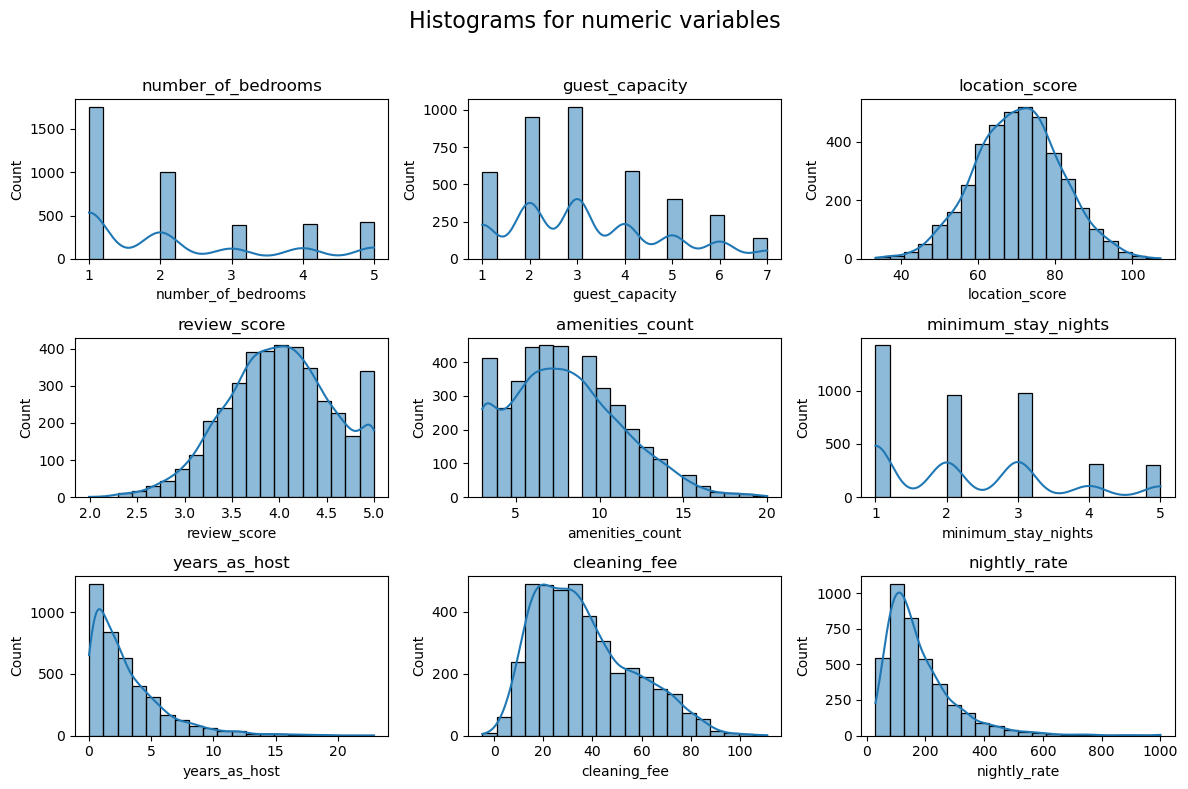

In [6]:
numeric=["number_of_bedrooms","guest_capacity","location_score","review_score","amenities_count",
         "minimum_stay_nights","years_as_host","cleaning_fee","nightly_rate"]
categorial=["property_type","host_response_time","season","cancellation_policy"]

import matplotlib.pyplot as plt
import seaborn as sns

def plot_histograms(dataframe, columns):
    valid_columns = [col for col in columns if col in dataframe.columns]
    if not valid_columns:
        return
    
    plt.figure(figsize=(12,8))
    for i, col in enumerate(valid_columns,1):
        plt.subplot((len(valid_columns)+2)//3,3,i)
        sns.histplot(dataframe[col],kde=True,bins=20)
        plt.title(col)

    plt.suptitle("Histograms for numeric variables", fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

plot_histograms(airbnb_df,numeric)

* The **location score** is normally distributed and it has a broad range, suggesting that **location score** is a key variable.
* **Yeas as host** and **nightly rate** are heavily right skewed, potential transformations might be needed.

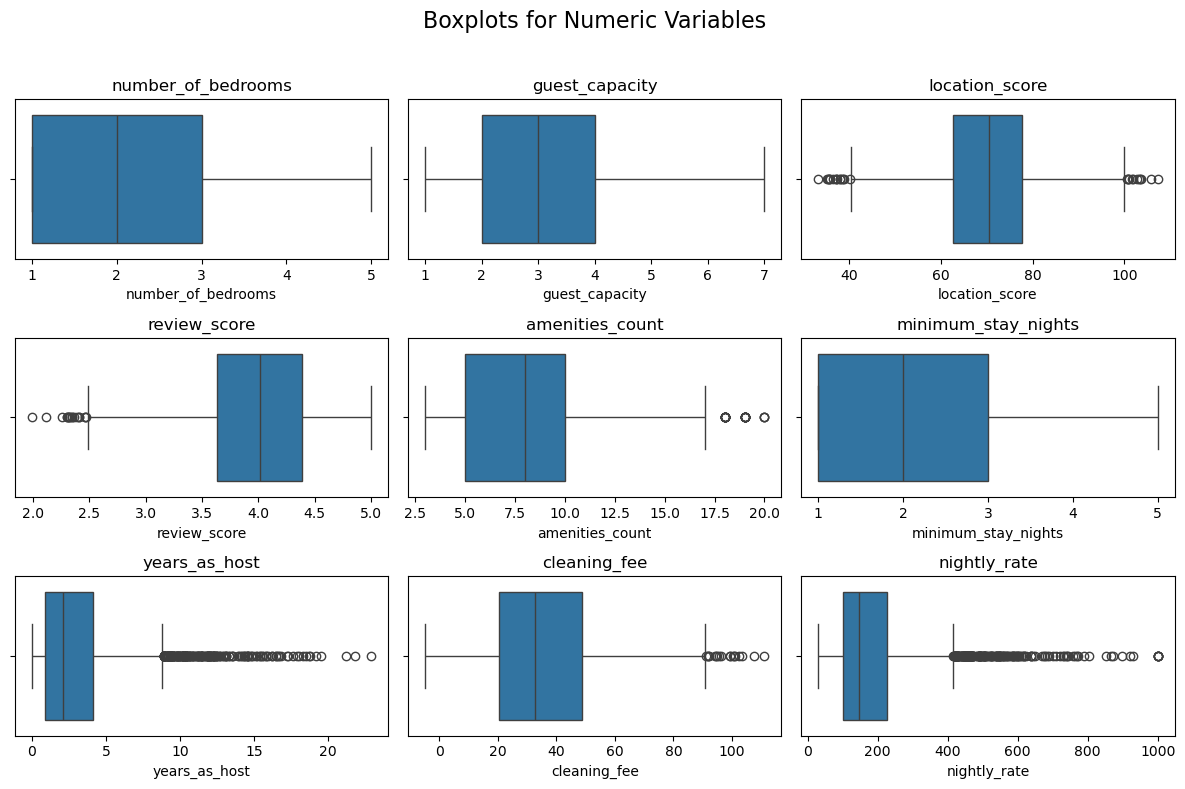

In [7]:
def plot_boxplot(dataframe, columns):
    valid_columns = [col for col in columns if col in dataframe.columns]
    if not valid_columns:
        return

    plt.figure(figsize=(12, 8))
    for i, col in enumerate(valid_columns, 1):
        plt.subplot((len(valid_columns) + 2) // 3, 3, i)
        sns.boxplot(x=dataframe[col])
        plt.title(col)
    
    plt.suptitle("Boxplots for Numeric Variables", fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

plot_boxplot(airbnb_df,numeric)

* The **location score** has outliers on both ends, indicating its normal distribution.
* **Review score** has some outliers on the low end, while **years as host**, **nightly rate** and **cleaning fee** have many outliers on the right-side. 

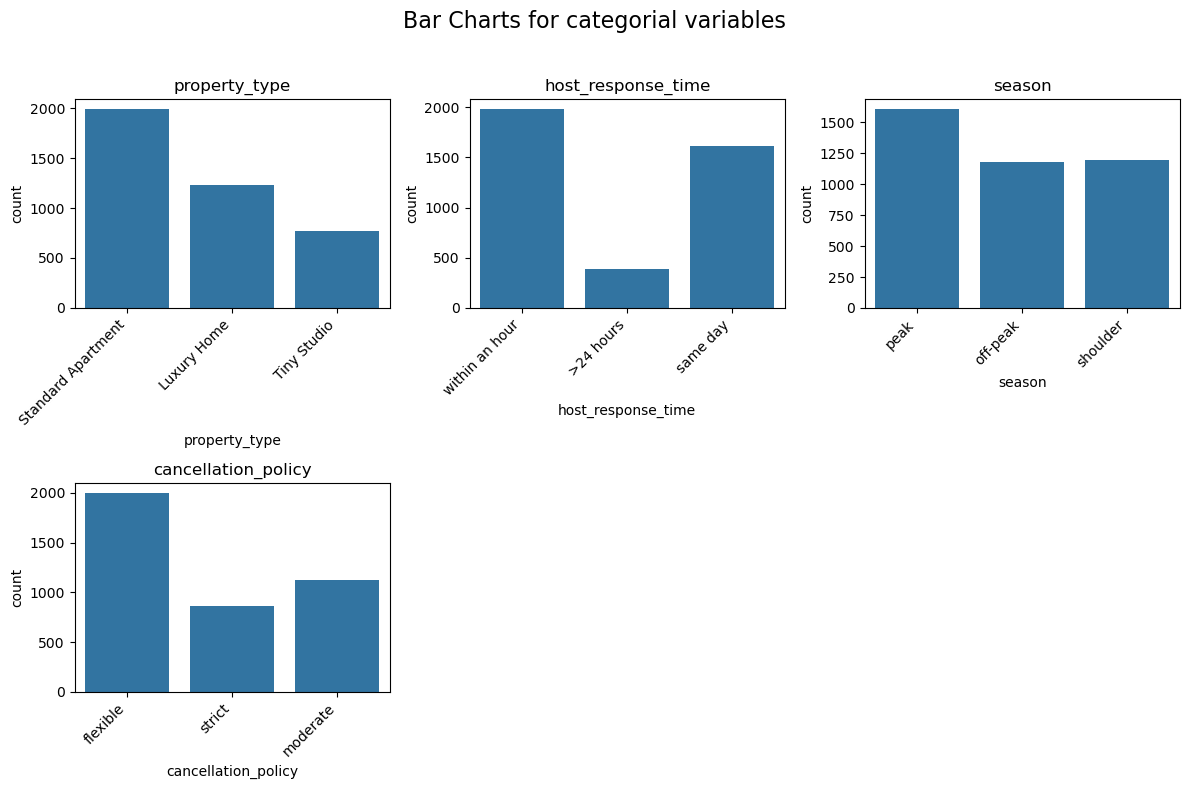

In [8]:
def plot_barcharts(dataframe,columns):
    valid_columns = [col for col in columns if col in dataframe.columns]
    if not valid_columns:
        return

    plt.figure(figsize=(12, 8))
    for i, col in enumerate(valid_columns, 1):
        plt.subplot((len(valid_columns) + 2) // 3, 3, i)
        sns.countplot(x=col, data=dataframe)
        plt.title(col)
        plt.xticks(rotation=45, ha='right')  
    plt.suptitle("Bar Charts for categorial variables", fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

plot_barcharts(airbnb_df,categorial)

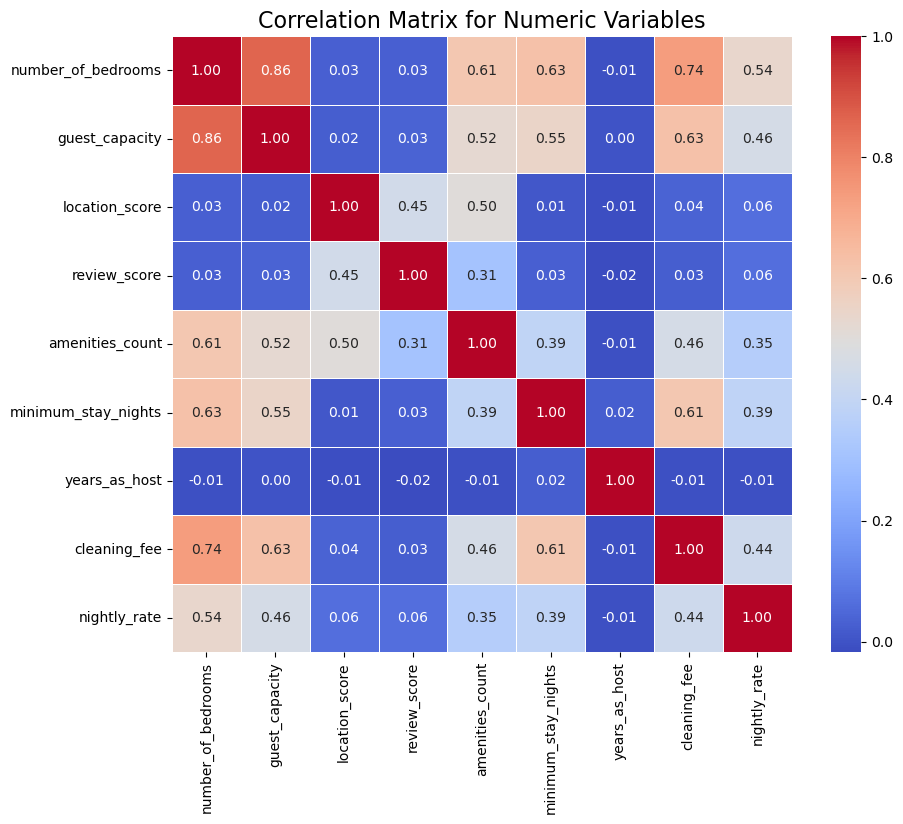

In [9]:
correlation_matrix=airbnb_df[numeric].corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix,annot=True,fmt=".2f", cmap='coolwarm', cbar=True, linewidths=0.5)
plt.title('Correlation Matrix for Numeric Variables', fontsize=16)
plt.show()

* There is a high correlation between **number of bedrooms** and **guest capacity**, **cleaning fee** and **number of bedrooms**. 
* There is a moderate correlation between **number of bedrooms** and **minimum stay nights**, **number of bedrooms** and **amenities count**.

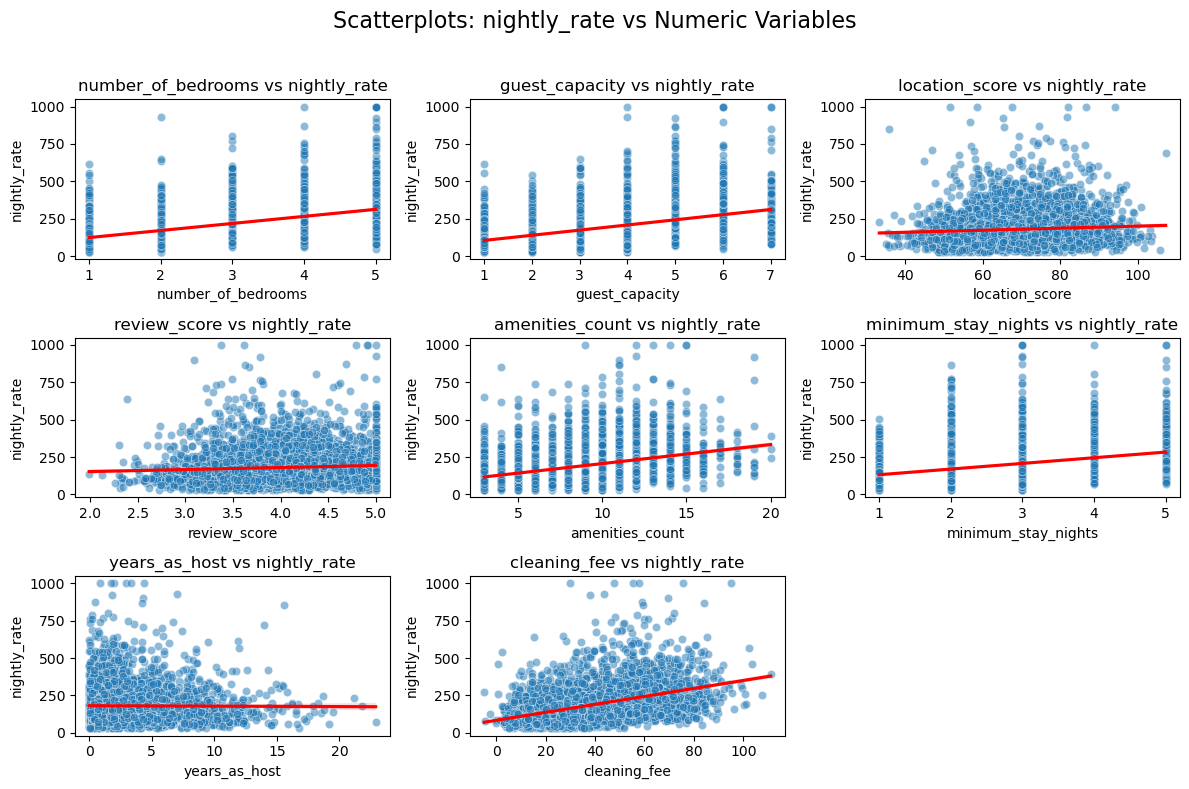

In [10]:
def plot_scatterplots(dataframe, columns, target):
    valid_columns = [col for col in columns if col in dataframe.columns and col != target]
    if not valid_columns:
        return

    plt.figure(figsize=(12, 8))
    for i, col in enumerate(valid_columns, 1):
        plt.subplot((len(valid_columns) + 2) // 3, 3, i)
        sns.scatterplot(x=dataframe[col], y=dataframe[target], alpha=0.5)
        sns.regplot(x=dataframe[col], y=dataframe[target], scatter=False, color='red')
        plt.title(f"{col} vs {target}")
    
    plt.suptitle(f"Scatterplots: {target} vs Numeric Variables", fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

plot_scatterplots(airbnb_df, numeric, "nightly_rate")

* From the scatterplots, we can conclude that number of bedrooms, guest capacity, amenities count, minimum stay nights and cleaning fee have clear upward trend with nightly rate, due to their rising red lines on the plots. 
* Because of the flat red lines, location score, review score and years as host display 

# 3. **Statistical Analysis**

### 3.1 Compare `nightly_rate` between different `property_types`
$H_0$: All property types have the same average nightly rate.  
$H_1$: At least one property type has a different average nightly rate.

In [22]:
from scipy.stats import f_oneway

df_h1=airbnb_df[['property_type', 'nightly_rate']].dropna()
print(df_h1.groupby('property_type')['nightly_rate'].mean().sort_values())
grouped_data = [group['nightly_rate'].values for name, group in df_h1.groupby('property_type')]
f_stat, p_val = f_oneway(*grouped_data)
print(f"\nF-statistic: {f_stat:.4f}, P-value: {p_val:.4f}")

property_type
Tiny Studio           118.088750
Standard Apartment    144.535543
Luxury Home           277.287439
Name: nightly_rate, dtype: float64

F-statistic: 822.6232, P-value: 0.0000


The P-value is 0, so we can reject the $H_0$ hypothesis, which means there is a statistically significant difference between different property type. Practically, the mean nightly rate for Luxury Home(\$277) is almost double than that of Standard Apartment(\$144), suggesting that property classification is an important pricing factor for hosts and guests.

### 3.2 Compare `nightly_rate` between different `host_response_time`
$H_0$: All host_response_time have the same average nightly rate.  
$H_1$: At least one host_response_time has a different average nightly rate.

In [24]:
df_h2=airbnb_df[['host_response_time', 'nightly_rate']].dropna()
print(df_h2.groupby('host_response_time')['nightly_rate'].mean().sort_values())
grouped_data = [group['nightly_rate'].values for name, group in df_h2.groupby('host_response_time')]
f_stat, p_val = f_oneway(*grouped_data)
print(f"\nF-statistic: {f_stat:.4f}, P-value: {p_val:.4f}")

host_response_time
>24 hours         176.880615
same day          177.937688
within an hour    182.913739
Name: nightly_rate, dtype: float64

F-statistic: 0.9249, P-value: 0.3966


The p-value is 0.3966, which is greater than 0.05, so we fail to reject the $H_0$ hypothesis. This means there is no statistically significant difference in nightly rates among listings with different host response times. Practically, the average nightly rate only ranges from $176.88 (for >24 hours) to $182.91 (for within an hour), a difference of less than $7. This small variation is likely not meaningful from a business perspective, suggesting that host response time may not be a key factor influencing price.

### 3.3 Compare nightly_rate between two groups based on location_score. 
$H_0$: There is no difference in average nightly rates between high and low location score listings.  
$H_1$: There is a difference in average nightly rates between high and low location score listings.

In [27]:
from scipy.stats import ttest_ind

airbnb_df['location_group'] = airbnb_df['location_score'] > airbnb_df['location_score'].median()

df_h3=airbnb_df[['location_group', 'nightly_rate']].dropna()
high_loc=df_h3[df_h3['location_group']==True]['nightly_rate']
low_loc=df_h3[df_h3['location_group']==False]['nightly_rate']

print("Mean nightly_rate (high location):", high_loc.mean())
print("Mean nightly_rate (low location):", low_loc.mean())

t_stat, p_val = ttest_ind(high_loc, low_loc, equal_var=False)
print(f"\nT-statistic: {t_stat:.4f}, P-value: {p_val:.4f}")


Mean nightly_rate (high location): 186.12470351758793
Mean nightly_rate (low location): 174.49551204819278

T-statistic: 3.0357, P-value: 0.0024


The p-value is 0.0024, which is less than 0.05, so we can reject the $H_0$ hypothesis. There is a statistically significant difference in nightly rates between high and low location score groups. However, pratically, the average difference is 12, suggesting that location score may not be a key factor influencing price. 

### 3.4 Compare `nightly_rate` between different `season`
$H_0$: All seasons have the same average nightly rate.  
$H_1$: At least one season has a different average nightly rate.

In [29]:
df_h4=airbnb_df[['season', 'nightly_rate']].dropna()
print(df_h4.groupby('season')['nightly_rate'].mean().sort_values())
grouped_data = [group['nightly_rate'].values for name, group in df_h4.groupby('season')]
f_stat, p_val = f_oneway(*grouped_data)
print(f"\nF-statistic: {f_stat:.4f}, P-value: {p_val:.4f}")

season
off-peak    143.157441
shoulder    173.695573
peak        212.502321
Name: nightly_rate, dtype: float64

F-statistic: 121.2035, P-value: 0.0000


The P-value is 0, so we can reject the $H_0$ hypothesis, which means there is a statistically significant difference between different seasons. Practically, the mean nightly rate for peak(\$277) is much higher than that of off-peak(\$143), suggesting that season is an important pricing factor.

### 3.5 Compare `nightly_rate` between different `number_of_bedrooms`
$H_0$: All number of bedrooms have the same average nightly rate.  
$H_1$: At least one group has a different average nightly rate.

In [30]:
df_h5=airbnb_df[['number_of_bedrooms', 'nightly_rate']].dropna()
print(df_h5.groupby('number_of_bedrooms')['nightly_rate'].mean().sort_values())
grouped_data = [group['nightly_rate'].values for name, group in df_h5.groupby('number_of_bedrooms')]
f_stat, p_val = f_oneway(*grouped_data)
print(f"\nF-statistic: {f_stat:.4f}, P-value: {p_val:.4f}")

number_of_bedrooms
1    129.085428
2    151.310359
3    249.738252
4    274.192118
5    305.067796
Name: nightly_rate, dtype: float64

F-statistic: 430.4302, P-value: 0.0000


The P-value is 0, so we can reject the $H_0$ hypothesis, which means there is a statistically significant difference between different seasons. Practically, the mean nightly rate increased from \$129 for one-bedroom group to \$305 for 5-bedroom group, suggesting that number of bedroom is an important pricing factor.

# 4. **Predictive modeling for inference**

### 4.1 Linear Regression

In [93]:
import statsmodels.api as sm
import numpy as np

y=airbnb_df['nightly_rate']
X=airbnb_df.drop(columns=['nightly_rate', 'listing_id'])
X = pd.get_dummies(X, drop_first=True,dtype=int)
X_with_const = sm.add_constant(X)

model = sm.OLS(y, X_with_const).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:           nightly_rate   R-squared:                       0.370
Model:                            OLS   Adj. R-squared:                  0.368
Method:                 Least Squares   F-statistic:                     145.8
Date:                Thu, 08 May 2025   Prob (F-statistic):               0.00
Time:                        06:21:41   Log-Likelihood:                -23825.
No. Observations:                3982   AIC:                         4.768e+04
Df Residuals:                    3965   BIC:                         4.779e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const 

- The model is **nonrobust**, I believe it is due to the multicollinearity, so I am about to check the **VIF**.

In [82]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_df = pd.DataFrame()
vif_df['feature'] = X.columns
vif_df['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_df.sort_values('VIF', ascending=False))

                              feature        VIF
2                      location_score  63.860393
3                        review_score  56.404022
0                  number_of_bedrooms  27.233317
1                      guest_capacity  19.037915
4                     amenities_count  16.025626
7                        cleaning_fee  11.904667
8    property_type_Standard Apartment   8.966063
5                 minimum_stay_nights   8.504415
9           property_type_Tiny Studio   6.143001
11  host_response_time_within an hour   5.780127
10        host_response_time_same day   4.928637
12                        season_peak   2.358571
13                    season_shoulder   2.010491
6                       years_as_host   2.009425
14       cancellation_policy_moderate   1.557656
15         cancellation_policy_strict   1.429941


In [88]:
X_1=X_with_const.drop(columns=["review_score","amenities_count","guest_capacity","cleaning_fee",
                               "minimum_stay_nights","years_as_host","host_response_time_same day","host_response_time_within an hour",
                               "cancellation_policy_moderate","cancellation_policy_strict"])
# "location_score","number_of_bedrooms",
model_1 = sm.OLS(y, X_1).fit()
print(model_1.summary())

                            OLS Regression Results                            
Dep. Variable:           nightly_rate   R-squared:                       0.369
Model:                            OLS   Adj. R-squared:                  0.368
Method:                 Least Squares   F-statistic:                     387.9
Date:                Thu, 08 May 2025   Prob (F-statistic):               0.00
Time:                        06:16:28   Log-Likelihood:                -23829.
No. Observations:                3982   AIC:                         4.767e+04
Df Residuals:                    3975   BIC:                         4.772e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

In [89]:
y_log = np.log1p(y)
model_log = sm.OLS(y_log, X_1).fit()
print(model_log.summary())

                            OLS Regression Results                            
Dep. Variable:           nightly_rate   R-squared:                       0.403
Model:                            OLS   Adj. R-squared:                  0.402
Method:                 Least Squares   F-statistic:                     446.7
Date:                Thu, 08 May 2025   Prob (F-statistic):               0.00
Time:                        06:16:29   Log-Likelihood:                -2596.8
No. Observations:                3982   AIC:                             5208.
Df Residuals:                    3975   BIC:                             5252.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

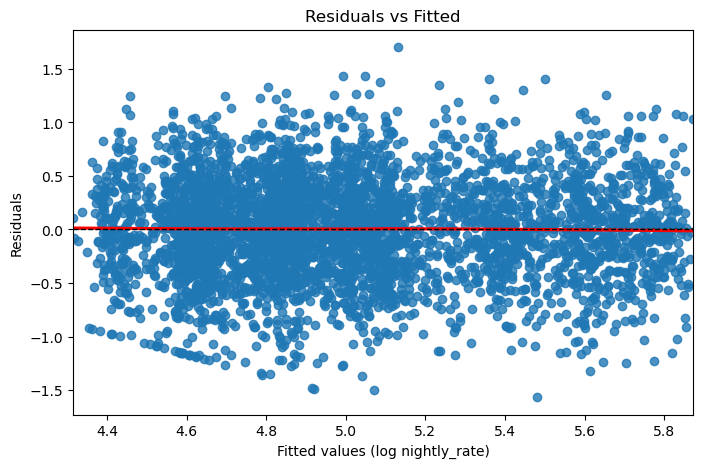

In [90]:
y_pred = model_log.fittedvalues
residuals = model_log.resid

# Residual plot
plt.figure(figsize=(8, 5))
sns.residplot(x=y_pred, y=residuals, lowess=True, line_kws={'color': 'red'})
plt.xlabel("Fitted values (log nightly_rate)")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted")
plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.show()

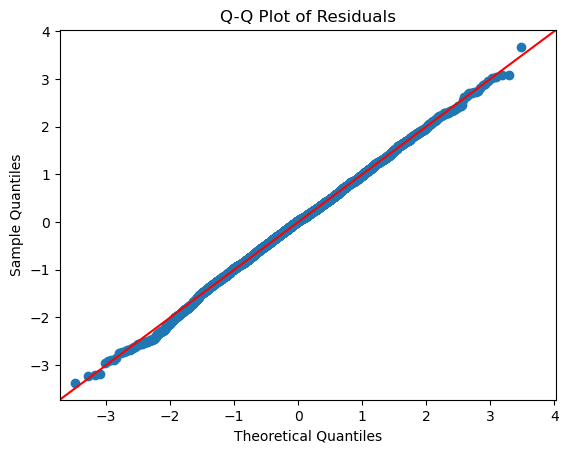

In [91]:
sm.qqplot(residuals, line='45', fit=True)
plt.title("Q-Q Plot of Residuals")
plt.show()

### 4.2 **Decision Tree**

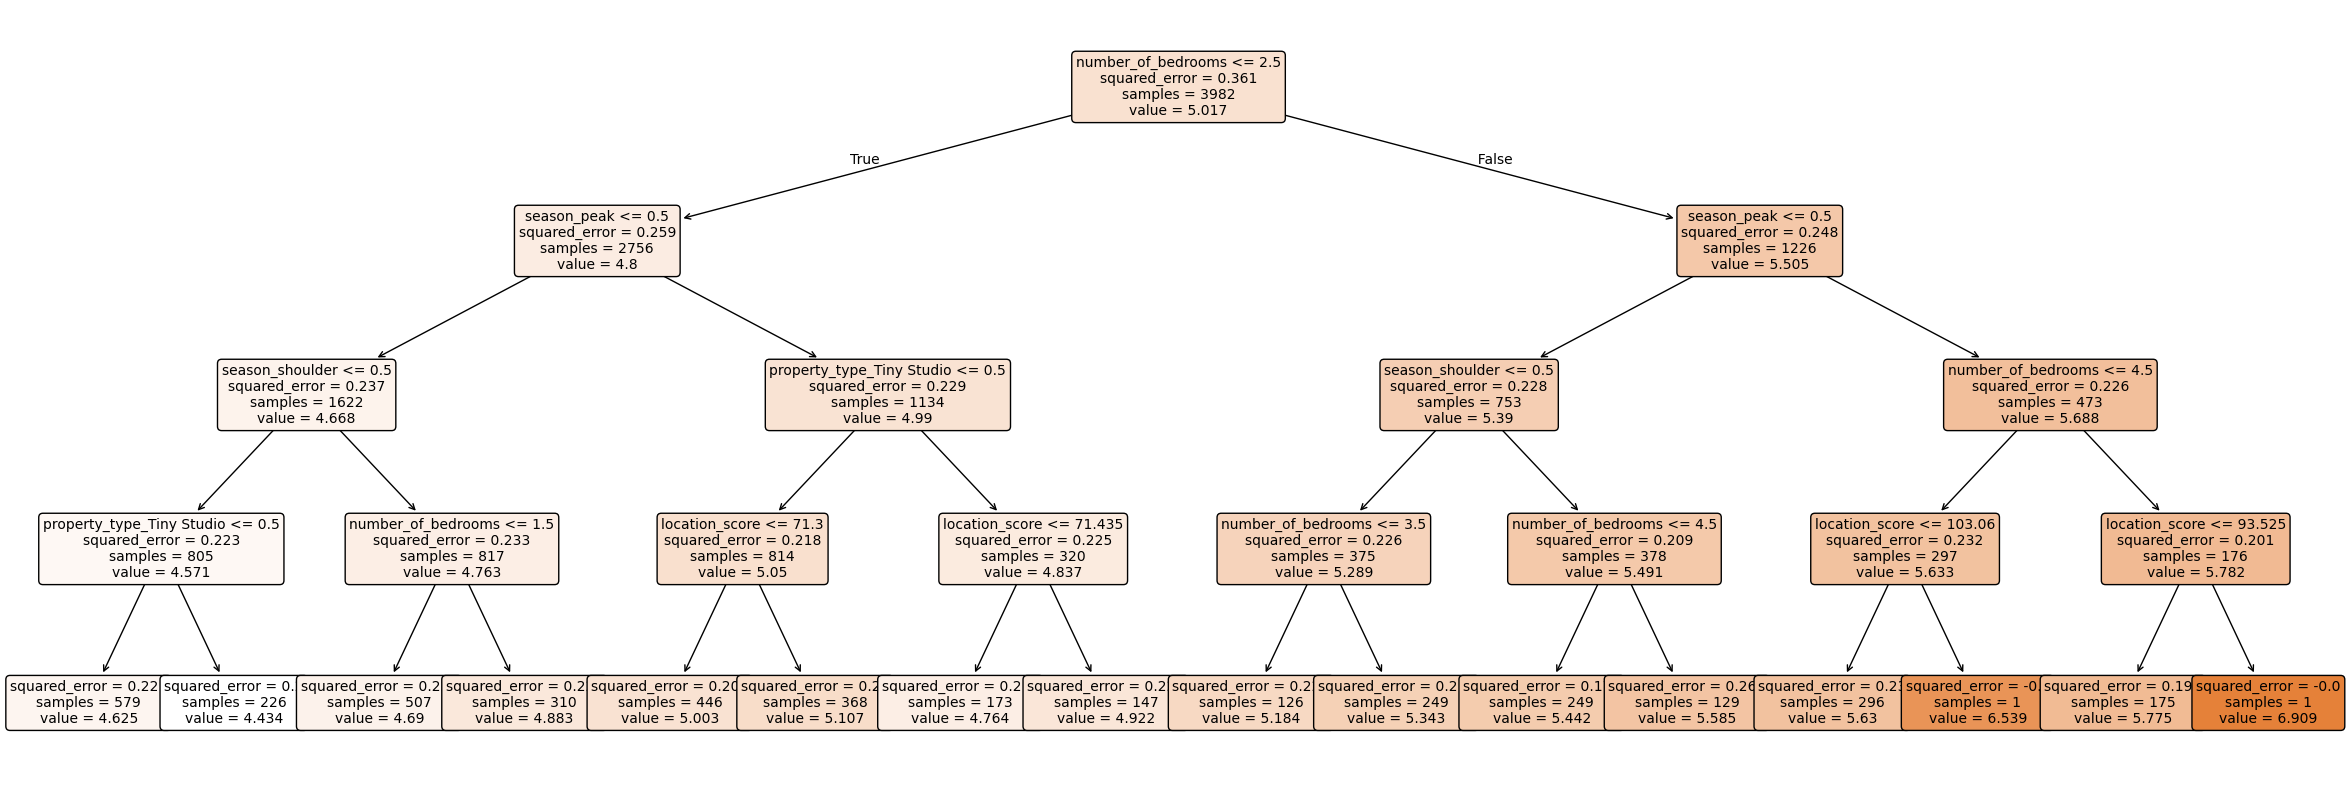

<function pandas.core.reshape.encoding.get_dummies(data, prefix=None, prefix_sep: 'str | Iterable[str] | dict[str, str]' = '_', dummy_na: 'bool' = False, columns=None, sparse: 'bool' = False, drop_first: 'bool' = False, dtype: 'NpDtype | None' = None) -> 'DataFrame'>

In [94]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_1, y_log, test_size=0.2, random_state=42)
tree_model = DecisionTreeRegressor(max_depth=4, random_state=42)
tree_model.fit(X_1, y_log) 

plt.figure(figsize=(30, 10))
plot_tree(tree_model, feature_names=X_1.columns, filled=True, rounded=True, fontsize=10)
plt.show()

pd.get_dummies

In [96]:
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_pred_lin = linreg.predict(X_test)
y_pred_tree= tree_model.predict(X_test)

print("Linear Regression:")
print("  R²:", r2_score(y_test, y_pred_lin))
print("  MAE:", mean_absolute_error(y_test, y_pred_lin))

print("\nDecision Tree:")
print("  R²:", r2_score(y_test, y_pred_tree))
print("  MAE:", mean_absolute_error(y_test, y_pred_tree))

Linear Regression:
  R²: 0.37885064997462947
  MAE: 0.39171134277518804

Decision Tree:
  R²: 0.37376302459665656
  MAE: 0.39207600056686276
